# distance viz preprocessing 

### utils

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopy.distance

In [2]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    calculate the distance in miles 
    between lat and lon
    """
    return geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).miles

### preprocessing

In [3]:
loc = pd.read_csv('data/locations_key.csv').drop(columns='address')
dst = pd.read_csv('data/distances.csv')

# TEMPORARY: limit size of csv because i haven't filled in dates too far back
dst = dst[dst.day_int >= 20200914]


dst = dst.merge(loc, how='left', left_on='imo', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'imo_lat',
    'lon':'imo_lon'
})
dst = dst.merge(loc, how='left', left_on='jwu', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'jwu_lat',
    'lon':'jwu_lon'
})

In [4]:
dst['distance'] = dst.apply(lambda row: calculate_distance(row.imo_lat, row.imo_lon, row.jwu_lat, row.jwu_lon), axis=1)

In [5]:
dst[dst.imo_lat != dst.imo_lat]

,date,pretty_date,imo,jwu,description,year,month,day,day_int,imo_lat,imo_lon,jwu_lat,jwu_lon,distance


In [6]:
dst['day_int'] = dst.year*10000 + dst.month*100 + dst.day
dst['log_distance'] = np.log(dst.distance + 1)
dst = dst[dst.day_int > 20200913]

In [7]:
dst.head()

,date,pretty_date,imo,jwu,description,year,month,day,day_int,imo_lat,imo_lon,jwu_lat,jwu_lon,distance,log_distance
0,15-08-2022,"Mon, Aug 15, 22",The Bluffs,The Bluffs,leezard+b visit sd,2022,8,15,20220815,33.178038,-117.322188,33.178038,-117.322188,0.0,0.0
1,14-08-2022,"Sun, Aug 14, 22",p's,p's,visit b+p in sf!,2022,8,14,20220814,37.811189,-122.271478,37.811189,-122.271478,0.0,0.0
2,13-08-2022,"Sat, Aug 13, 22",p's,p's,visit b+p in sf!,2022,8,13,20220813,37.811189,-122.271478,37.811189,-122.271478,0.0,0.0
3,12-08-2022,"Fri, Aug 12, 22",p's,p's,visit b+p in sf!,2022,8,12,20220812,37.811189,-122.271478,37.811189,-122.271478,0.0,0.0
4,11-08-2022,"Thu, Aug 11, 22",p's,p's,visit b+p in sf!,2022,8,11,20220811,37.811189,-122.271478,37.811189,-122.271478,0.0,0.0


### initial plot idea

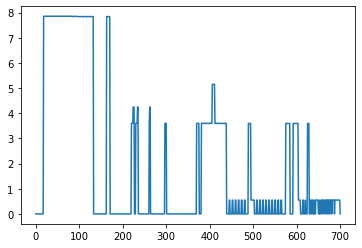

In [8]:
plt.plot(dst.log_distance)

### output data ready for viz :) 

In [9]:
dst.to_csv(r'data/processed.csv')